In [10]:
from task_2_NER_ImgCls.src.train_ner import train_ner
from task_2_NER_ImgCls.src.train_img import train_model
from task_2_NER_ImgCls.src.infer_img import predict
from task_2_NER_ImgCls.src.infer_ner import infer_ner
from task_2_NER_ImgCls.src.pipeline import check
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from task_2_NER_ImgCls.src.img_classification.img_data_preprocessing import get_data_loader
import json
import torch
from task_2_NER_ImgCls.src.paths import TRAIN_DIR, VAL_DIR, TRAIN_NER

# 1. NER model

In [2]:
with open(TRAIN_NER) as file:
    train_data = json.load(file)
train_ner(train_data)

Iteration 1, Loss: 880.5029296875
Iteration 2, Loss: 85.88187408447266
Iteration 3, Loss: 37.554927825927734
Iteration 4, Loss: 13.514422416687012
Iteration 5, Loss: 8.794157028198242
Iteration 6, Loss: 17.44383430480957
Iteration 7, Loss: 8.41835880279541
Iteration 8, Loss: 6.051482677459717
Iteration 9, Loss: 3.2260024547576904
Iteration 10, Loss: 4.287901878356934
Iteration 11, Loss: 12.456828117370605
Iteration 12, Loss: 6.3846306800842285
Iteration 13, Loss: 6.897820949554443
Iteration 14, Loss: 2.0578134059906006
Iteration 15, Loss: 3.58978271484375
Iteration 16, Loss: 3.4149436950683594
Iteration 17, Loss: 5.187286376953125
Iteration 18, Loss: 12.698694229125977
Iteration 19, Loss: 3.589616537094116
Iteration 20, Loss: 2.0384278297424316
Iteration 21, Loss: 1.6744158267974854
Iteration 22, Loss: 1.999264121055603
Iteration 23, Loss: 4.187989234924316
Iteration 24, Loss: 3.379570960998535
Iteration 25, Loss: 11.027678489685059
Iteration 26, Loss: 5.271061897277832
Iteration 27, L

In [5]:
# function infer_ner is looking foe ANIMAL entity
sentences = ["There is a cow in the image.", "I see a dog in this photo.", "The picture contains a cat."]
entities = [infer_ner(text) for text in sentences]
print(entities)

[['cow'], ['dog'], ['cat']]


## 2. Img classification

In [3]:
train_loader = get_data_loader(TRAIN_DIR, 64)
val_loader = get_data_loader(VAL_DIR, 64)
device = "cuda" if torch.cuda.is_available() else "cpu"

model = train_model(train_loader, val_loader, device)

Epoch 1/50, Train Loss: 0.5339, Train Acc: 88.54%, Val Loss: 0.2232, Val Acc: 94.75%
Epoch 2/50, Train Loss: 0.2354, Train Acc: 93.59%, Val Loss: 0.1758, Val Acc: 95.51%
Epoch 3/50, Train Loss: 0.1925, Train Acc: 94.54%, Val Loss: 0.1573, Val Acc: 95.67%
Epoch 4/50, Train Loss: 0.1760, Train Acc: 94.65%, Val Loss: 0.1502, Val Acc: 95.69%
Epoch 5/50, Train Loss: 0.1699, Train Acc: 94.86%, Val Loss: 0.1493, Val Acc: 95.89%
Epoch 6/50, Train Loss: 0.1577, Train Acc: 95.19%, Val Loss: 0.1423, Val Acc: 95.97%
Epoch 7/50, Train Loss: 0.1470, Train Acc: 95.53%, Val Loss: 0.1420, Val Acc: 95.87%
Epoch 8/50, Train Loss: 0.1438, Train Acc: 95.52%, Val Loss: 0.1402, Val Acc: 96.02%
Epoch 9/50, Train Loss: 0.1433, Train Acc: 95.46%, Val Loss: 0.1408, Val Acc: 95.97%
Epoch 10/50, Train Loss: 0.1372, Train Acc: 95.64%, Val Loss: 0.1353, Val Acc: 96.30%
Epoch 11/50, Train Loss: 0.1388, Train Acc: 95.69%, Val Loss: 0.1413, Val Acc: 96.20%
Epoch 12/50, Train Loss: 0.1339, Train Acc: 95.79%, Val Loss: 0

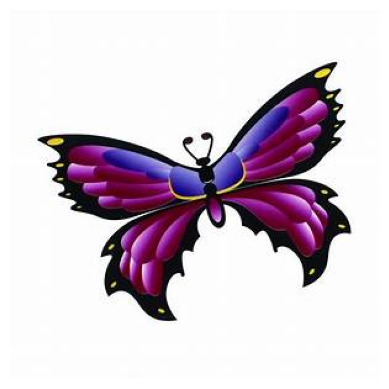

In [13]:
path_to_img = r"D:\test winstarai\Yovsa_test_winstarsAI\task_2_NER_ImgCls\data\data_img\test\butterfly\OIP-vUluSoFD-0zwb1ynGpchHQHaHa.jpeg"
img = mpimg.imread(path_to_img)

plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
predict(path_to_img)

'butterfly'

# 3. Pipeline

In [15]:
check(path_to_img, "I see a butterfly in this photo.")

True

In [16]:
check(path_to_img, "I see a cat in this photo.")

False